# Machine Learning - Unsupervised Learning and Feature Engineering
## Unit 3. Dimensionality Reduction
### Lecturer: Tai Le Quy
#### 17.8.2023
Thanks Prof. Dr. Christian Müller-Kett for his code.

## 1. Principal component analysis (PCA)

In [1]:
# IU - International University of Applied Science
# Machine Learning - Unsupervised Machine Learning
# Course Code: DLBDSMLUSL01

# Principal component analysis

#%% import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#%% load the sample data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
#%% standardize the data scales
X_std = StandardScaler().fit_transform(X)

In [4]:
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
#%% calculate the variance-covariance matrix
cov_X_std = np.cov(X_std.T)

print(cov_X_std)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [6]:
#%% compute Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_X_std)

print(eig_vals)

[2.93808505 0.9201649  0.14774182 0.02085386]


In [7]:
print(eig_vecs)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [9]:
#%% calculating the total sum of Eigenvalues
tot = sum(eig_vals) 
print(tot)
# console output: 4.026845637583896

#%% sorting Eigenvalues in decreasing order
exp_var = sorted(eig_vals, reverse=True)

#%% present values as percentages
exp_var = exp_var/tot * 100

#%% print the explained variance
print("Explained variance per PC:", exp_var)

4.026845637583896
Explained variance per PC: [72.96244541 22.85076179  3.66892189  0.51787091]


In [10]:
#%% Computing and print the explained cumulative variance 
cum_exp_var = np.cumsum(exp_var)
print("Cumulative Explained Variance:",cum_exp_var)

Cumulative Explained Variance: [ 72.96244541  95.8132072   99.48212909 100.        ]


In [37]:
#%%
# display the proportion of variance
# which is explained by the first two PC
print("Explained variance by PC1 and PC2:", sum(exp_var[0:2]))

Explained variance by PC1 and PC2: 95.81320720000163


In [11]:
#%% construct a projection matrix
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
             for i in range(len(eig_vals))]
PR = np.hstack((eig_pairs[0][1].reshape(4,1), 
                eig_pairs[1][1].reshape(4,1))) 

In [12]:
PR

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

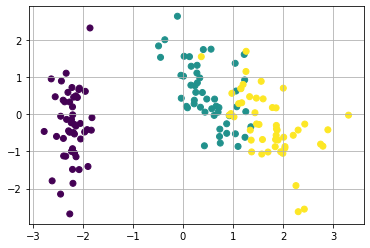

In [13]:
#%%
# project the original data to the feature
# which is reduced in dimensions
Y = X_std.dot(PR) 
YL = np.append(Y, y.reshape(150,1), axis=1)

#%% plot the projected data
plt.scatter(x=YL[:,0], y=YL[:,1], c=YL[:,2])
plt.grid()
plt.show()

In [14]:
YL

array([[-2.26470281, -0.4800266 ,  0.        ],
       [-2.08096115,  0.67413356,  0.        ],
       [-2.36422905,  0.34190802,  0.        ],
       [-2.29938422,  0.59739451,  0.        ],
       [-2.38984217, -0.64683538,  0.        ],
       [-2.07563095, -1.48917752,  0.        ],
       [-2.44402884, -0.0476442 ,  0.        ],
       [-2.23284716, -0.22314807,  0.        ],
       [-2.33464048,  1.11532768,  0.        ],
       [-2.18432817,  0.46901356,  0.        ],
       [-2.1663101 , -1.04369065,  0.        ],
       [-2.32613087, -0.13307834,  0.        ],
       [-2.2184509 ,  0.72867617,  0.        ],
       [-2.6331007 ,  0.96150673,  0.        ],
       [-2.1987406 , -1.86005711,  0.        ],
       [-2.26221453, -2.68628449,  0.        ],
       [-2.2075877 , -1.48360936,  0.        ],
       [-2.19034951, -0.48883832,  0.        ],
       [-1.898572  , -1.40501879,  0.        ],
       [-2.34336905, -1.12784938,  0.        ],
       [-1.914323  , -0.40885571,  0.   

#### Doing it the easy way

In [40]:
#%% doing it the easy way
pca = PCA().fit(X_std)

In [41]:
#%% extract the explaind variance ratios
var_exp = pca.explained_variance_ratio_
print(var_exp)

[0.72962445 0.22850762 0.03668922 0.00517871]


In [42]:
#%% calculate the explained cumulative variance
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[0.72962445 0.95813207 0.99482129 1.        ]


In [43]:
#%% extract the Eigenvectors
eig_vecs = pca.components_
print(eig_vecs)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [15]:
# use PCA to project the data to a two-dimensional
# feature space
Y = PCA(n_components=2).fit(X_std).transform(X_std)

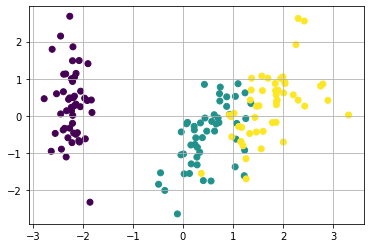

In [16]:
#%% plot the projected data
Y = np.append(Y, y.reshape(150,1), axis=1)
plt.scatter(x=Y[:,0], y=Y[:,1], c=Y[:,2])
#plt.scatter(x=Y[:,0], y=Y[:,1])
plt.grid()
plt.show()

## 2. PCA correlation graph

In [52]:
#Install mlxtend, run only one time
!pip install mlxtend
#Install using Anaconda, run at command prompt
#conda install -c mlxtend

In [17]:
#%% import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_pca_correlation_graph


In [18]:
#%% load and standardize data
iris = datasets.load_iris()
X = iris.data
X_std = StandardScaler().fit_transform(X)

#%% specify feature names
feature_names = ['sepal length','sepal width',  
                 'petal length','petal width']


                 Dim 1     Dim 2
sepal length -0.890169 -0.360830
sepal width   0.460143 -0.882716
petal length -0.991555 -0.023415
petal width  -0.964979 -0.064000


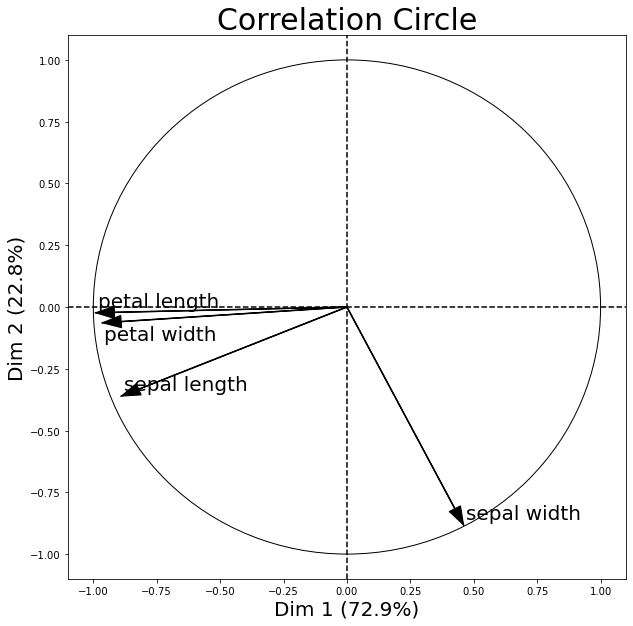

In [19]:
# calculate the correlation matrix and
# create a correlation graph
fig, cor_mat = plot_pca_correlation_graph(X_std, feature_names, dimensions=(1, 2),  figure_axis_size=10)

#%%
# show the numbers of the correlation
# matrix for the 4 features 
print(cor_mat)

## 3. Multi-Dimensional Scaling (MDS)

In [20]:
# Multi-Dimensional Scaling (MDS)

#%% import libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [21]:
#%% load the sample data set
iris = datasets.load_iris()
X = iris.data

#%% normalize the data
X_scaled = MinMaxScaler().fit_transform(X)

In [22]:
#%% conduct MDS on the data
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

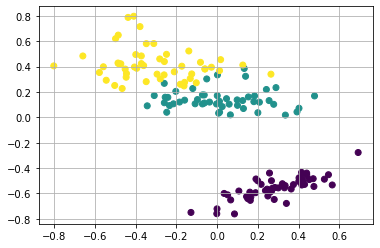

In [23]:
#%%
# Plot the projected Iris data points into the reduced
# feature space by MDS 
plt.scatter(x=X_2d[:,0], y=X_2d[:,1], c=iris.target)
plt.grid()
plt.show()

## 4. Multi-Dimensional Scaling - Swiss roll dataset

In [1]:
# Multi-Dimensional Scaling - Swiss roll dataset

#%% import libraries
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
import matplotlib.pyplot as plt

In [2]:
#%% generate swiss roll data
n_pts = 1000
X, color = datasets.make_s_curve(n_pts, random_state=0)

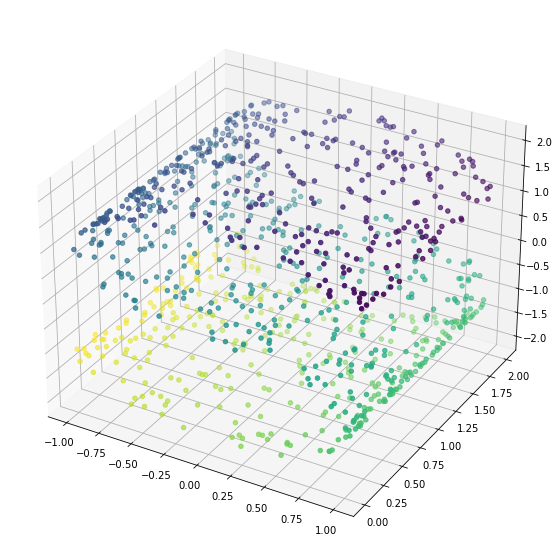

In [3]:
#%% plotting the data in 3D
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=color)
plt.show()

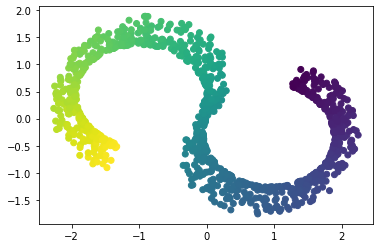

In [80]:
#%%
# project the data into a 2-dimensional feature
# space using MDS
n_components = 2
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X)

# display the projected data in the 2-dimensional
# feature space
plt.scatter(X_2d[:,0], X_2d[:,1], c=color)
plt.show()

## 5. Local Linear Embedding

In [24]:
# Local Linear Embedding (LLE)

#%% import the required libraries
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold, datasets

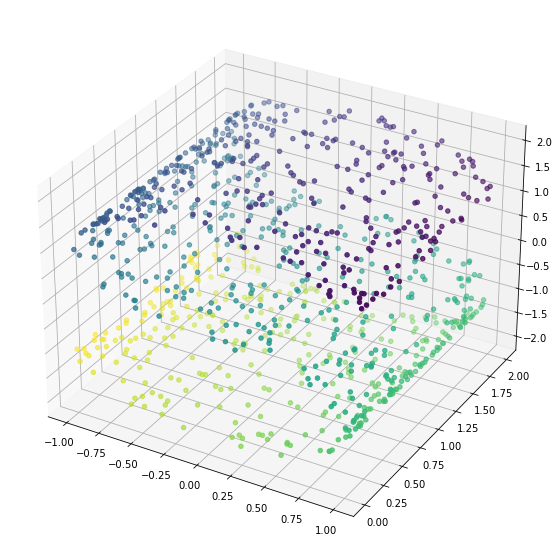

In [26]:
#%% generate 1000 data points of the Swiss roll dataset 
n_pts = 1000
X, color = datasets.make_s_curve(n_pts, random_state=0)

#%% display the data points
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=X[:,0], ys=X[:,1], zs=X[:,2], c=color)
plt.grid()
plt.show()    

In [29]:
X

array([[ 0.44399868,  1.18576054, -0.10397256],
       [ 0.89724097,  0.02012739, -1.44154121],
       [ 0.8240493 ,  0.95165239, -0.43348191],
       ...,
       [-0.8362143 ,  0.96021561, -1.54840282],
       [-0.55148773,  1.28772807,  1.834183  ],
       [ 0.99513117,  1.00354626, -1.09855936]])

In [27]:
#%%
# apply LLE to the generated Swiss roll dataset
# to project it into a 2-dimensional feature space
embedding = LocallyLinearEmbedding(n_neighbors=12, n_components=2)
X_2d = embedding.fit_transform(X)


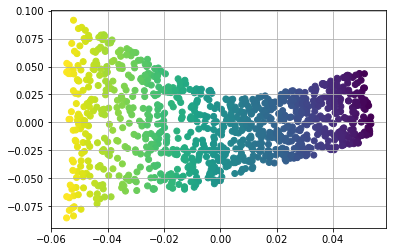

In [28]:
#%%
# display the data points in the
# reduced feature space
plt.scatter(X_2d[:,0], X_2d[:,1], c=color)
plt.grid()
plt.show()    